In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 
# Adjusts the style to emulate ggplot
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('/Users/poorvajaiyer/Desktop/natwest/input/cubic_zirconia.csv')
data

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
...,...,...,...,...,...,...,...,...,...,...,...
26962,26963,1.11,Premium,G,SI1,62.3,58.0,6.61,6.52,4.09,5408
26963,26964,0.33,Ideal,H,IF,61.9,55.0,4.44,4.42,2.74,1114
26964,26965,0.51,Premium,E,VS2,61.7,58.0,5.12,5.15,3.17,1656
26965,26966,0.27,Very Good,F,VVS2,61.8,56.0,4.19,4.20,2.60,682


In [3]:
data_dict = pd.read_excel('/Users/poorvajaiyer/Desktop/natwest/input/Data Dictionary.xlsx')
data_dict

,Variable Name,Description
0,Carat,Carat weight of the cubic zirconia.
1,Cut,Describe the cut quality of the cubic zirconi...
2,Color,Colour of the cubic zirconia.With D being the...
3,Clarity,cubic zirconia Clarity refers to the absence ...
4,Depth,"The Height of a cubic zirconia, measured from..."
5,Table,The Width of the cubic zirconia's Table expre...
6,Price,the Price of the cubic zirconia.
7,X,Length of the cubic zirconia in mm.
8,Y,Width of the cubic zirconia in mm.
9,Z,Height of the cubic zirconia in mm.


In [4]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [5]:
data.shape

(26967, 11)

In [6]:
data.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [7]:
# 697 Missing values 
data = data.iloc[:,1:]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [9]:
data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [10]:
type_data = data.dtypes
missing_data = data.isna().mean().round(4)*100
desc_data = data.describe(include='all')
data1 = pd.DataFrame(missing_data, columns= ['Missing'])
data2 = pd.DataFrame(type_data, columns = ['Dtype'])
data3 = pd.DataFrame(desc_data)

data3 = data3.T
data_tab = pd.concat([data1, data2, data3], axis = 1)
data_tab.sort_values(by='Missing', ascending = False)

,Missing,Dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.58,float64,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
carat,0.00,float64,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,0.00,float64,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,0.00,float64,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,0.00,float64,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8
price,0.00,int64,26967.0,NaN,NaN,NaN,3939.518115,4024.864666,326.0,945.0,2375.0,5360.0,18818.0


# EDA

In [11]:
data['depth'].fillna(data['depth'].mean(), inplace = True)

In [12]:
print(f' Before Removing Duplicates {data.shape}')
data.drop_duplicates(inplace = True)
print(f' After Removing Duplicates {data.shape}')

 Before Removing Duplicates (26967, 10)
 After Removing Duplicates (26933, 10)


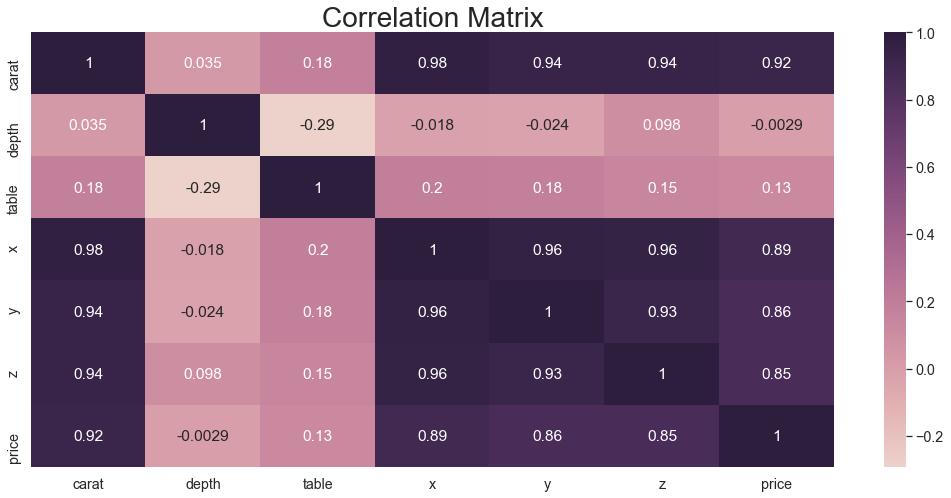

In [13]:
cmatrix = data.corr()
plt.figure(figsize=(18,8))
sns.set(font_scale=1.3)
cmap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(cmatrix, cmap=cmap, annot= True)
plt.title("Correlation Matrix", fontsize = 28)
plt.savefig('plot1.png', dpi = 300, bbox_inches = 'tight')
plt.show()

# Univariate Analysis

/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


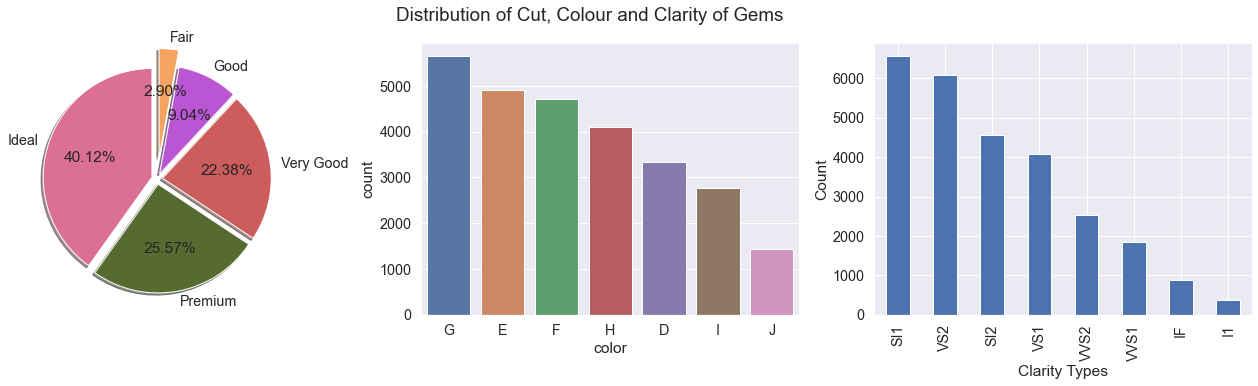

In [15]:
plt.rcParams['figure.figsize'] = 23, 5 
plt.subplot(131)
plt.pie( data['cut'].value_counts().values, 
         labels=data['cut'].value_counts().index,
         startangle= 90,
         colors = ["PaleVioletRed", "DarkOliveGreen", "IndianRed", "MediumOrchid", "SandyBrown"],
         explode = [0.05, 0.05, 0.05, 0.05, 0.2],
         shadow = True, 
         autopct = '%1.2f%%'
       )
plt.subplot(132)

sns.countplot(data['color'], order = data['color'].value_counts().index)

plt.subplot(133)
data["clarity"].value_counts().plot.bar()
plt.xlabel('Clarity Types')
plt.ylabel('Count')
plt.suptitle('Distribution of Cut, Colour and Clarity of Gems')
plt.show()

/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

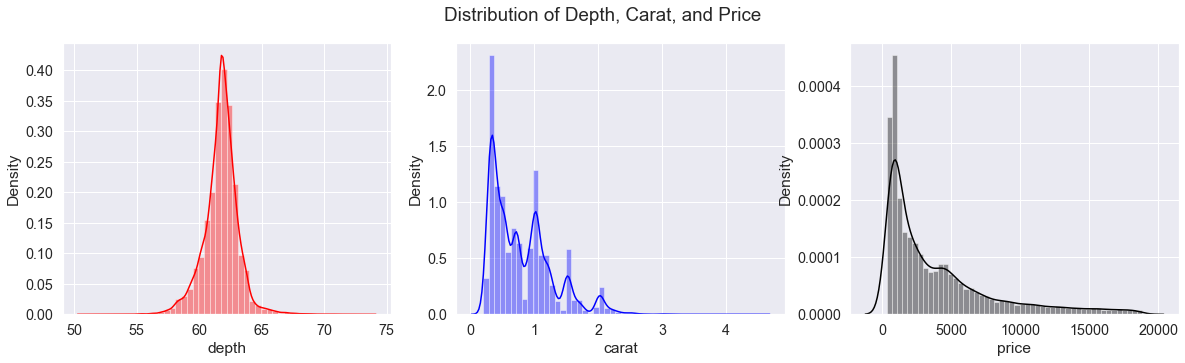

In [16]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(data['depth'], color='red')

plt.subplot(132)
sns.distplot(data['carat'], color='blue')

plt.subplot(133)
sns.distplot(data['price'], color='black')

plt.suptitle('Distribution of Depth, Carat, and Price')
plt.show()

/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpr

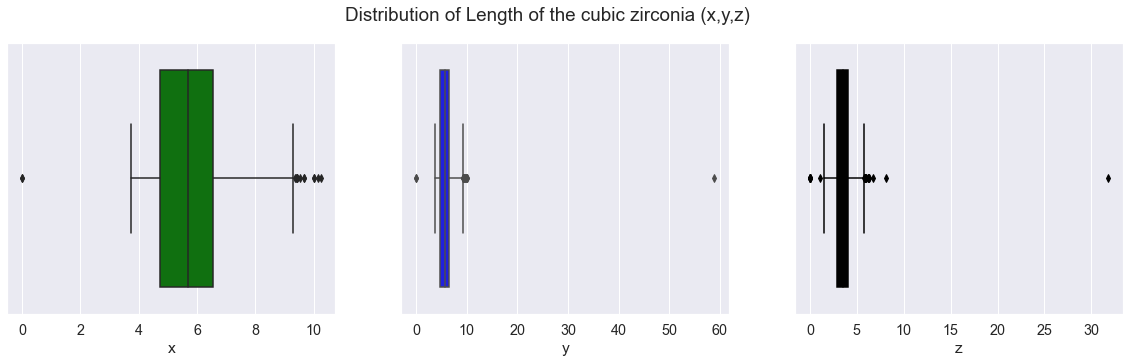

In [17]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(data['x'], color='green')

plt.subplot(132)
sns.boxplot(data['y'], color='blue')

plt.subplot(133)
sns.boxplot(data['z'], color='black')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

# Bivariate Analysis

/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


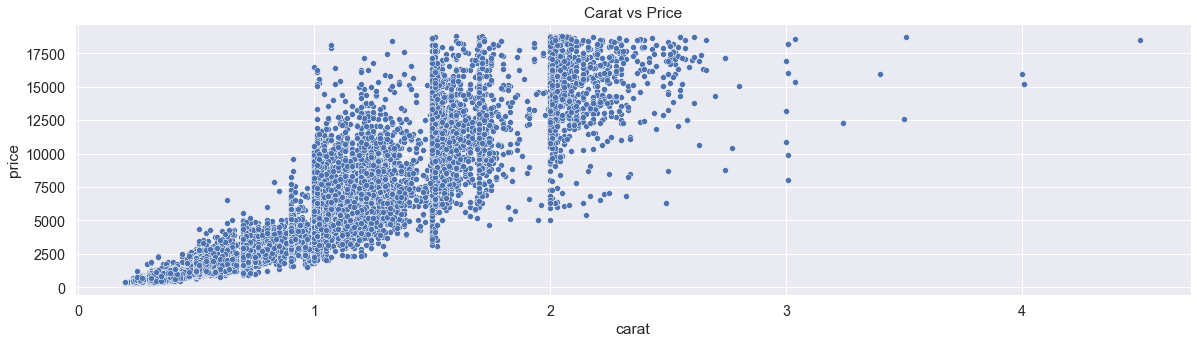

In [18]:
sns.scatterplot(data['carat'], data['price'])
plt.title('Carat vs Price')
plt.show()

/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

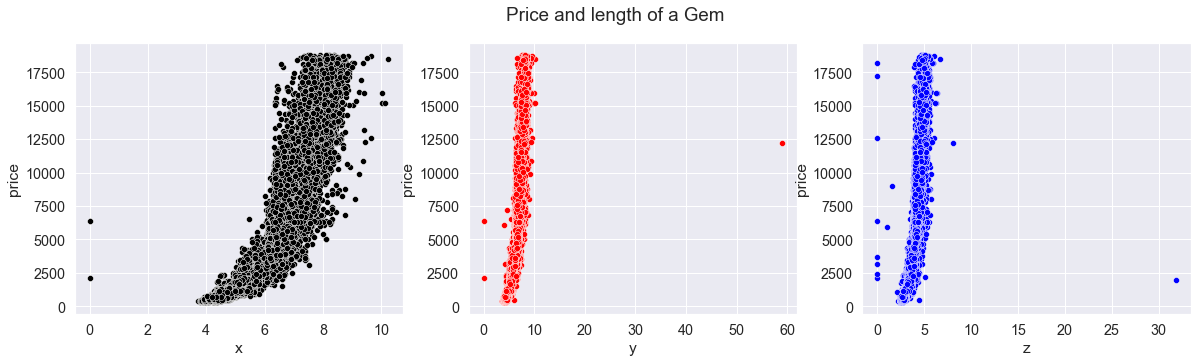

In [19]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(data['x'], data['price'], color='black')

plt.subplot(132)
sns.scatterplot(data['y'], data['price'], color='red')

plt.subplot(133)
sns.scatterplot(data['z'], data['price'], color='blue')

plt.suptitle('Price and length of a Gem')
plt.show()

# Multivariate Analysis

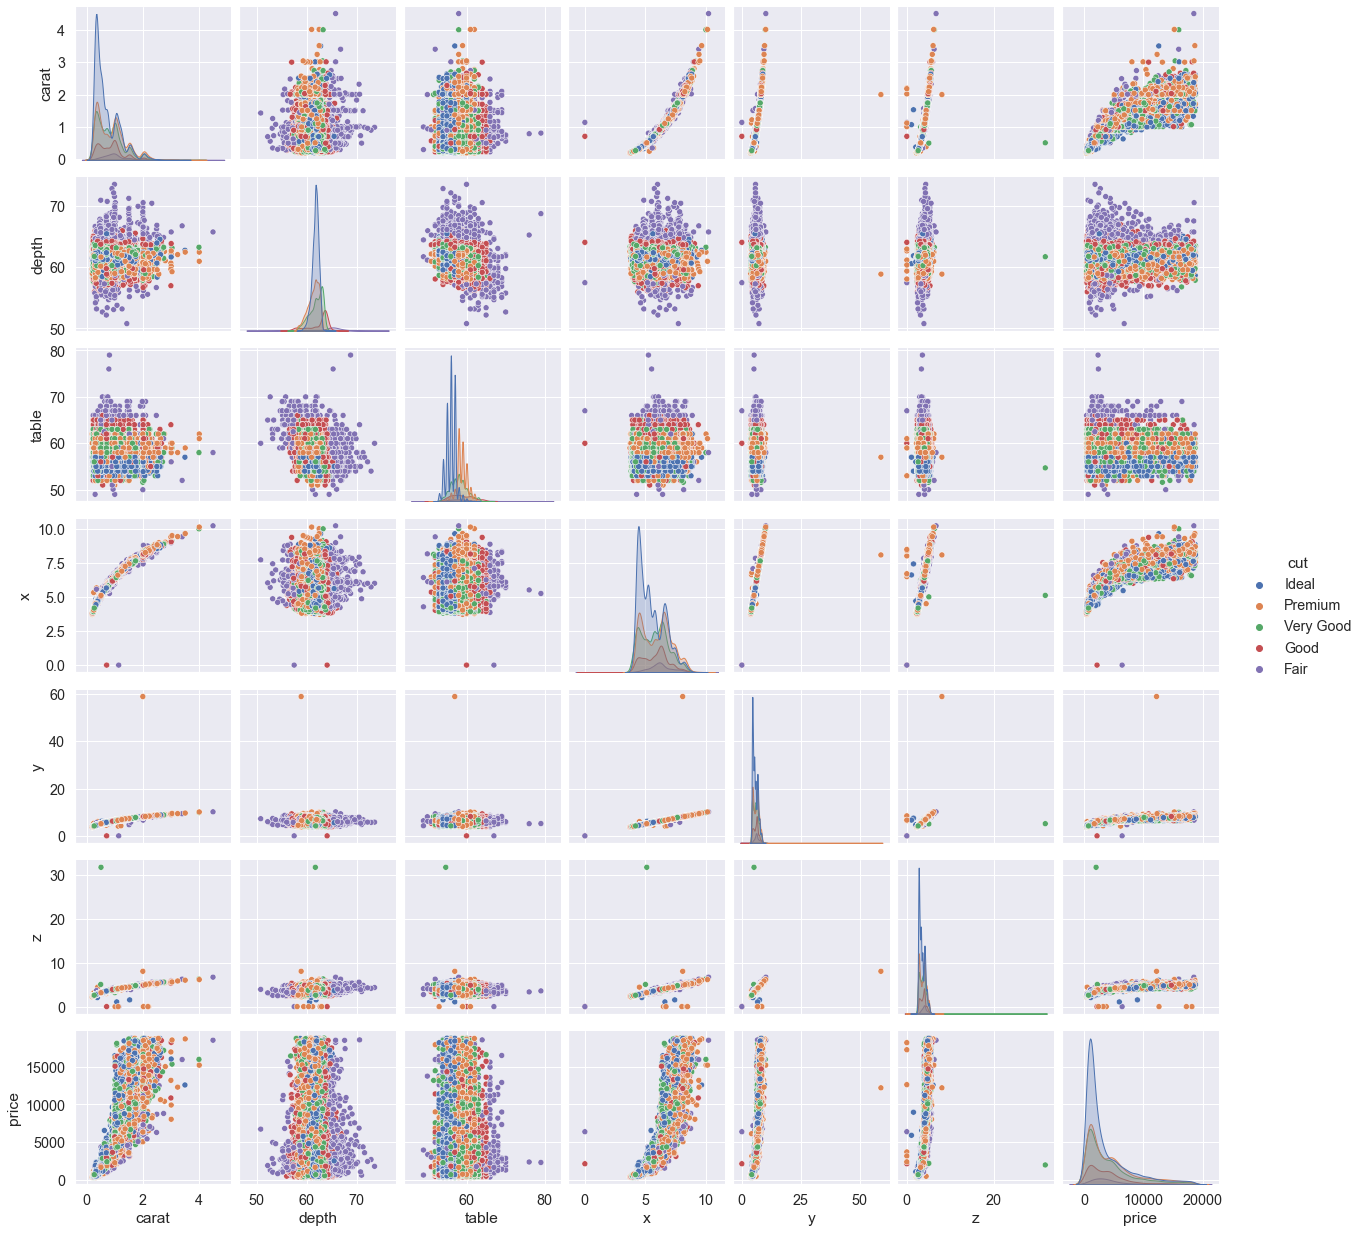

In [20]:
sns.pairplot(data, hue = 'cut')
plt.show()

/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


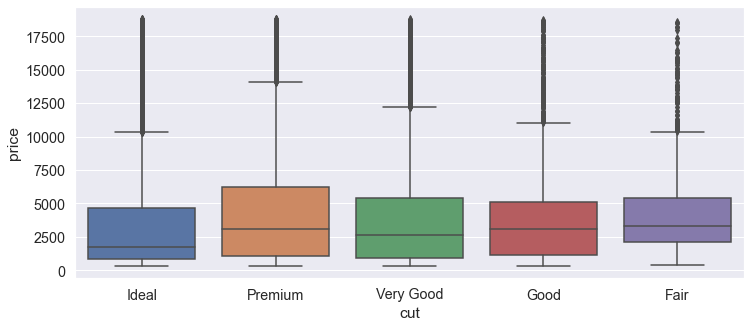

In [21]:
plt.figure(figsize = (12,5))
sns.boxplot(data['cut'], data['price'])
plt.show()

/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


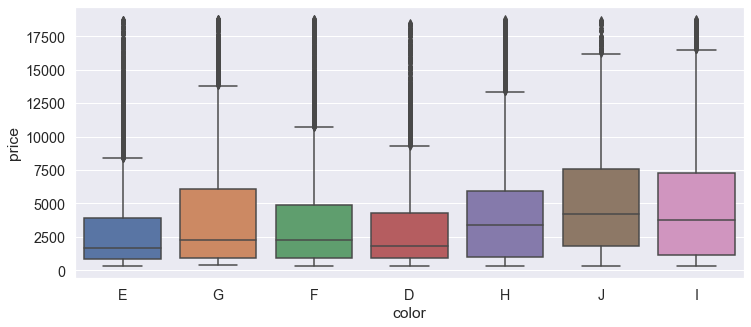

In [22]:
plt.figure(figsize = (12,5))
sns.boxplot(data['color'], data['price'])
plt.show()

/Users/poorvajaiyer/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


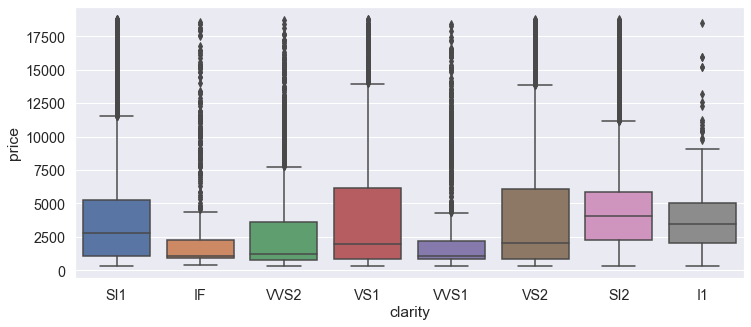

In [23]:
plt.figure(figsize = (12,5))
sns.boxplot(data['clarity'], data['price'])
plt.show()

In [24]:
data[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='crest')

In [25]:
data[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='flare')

In [26]:
data[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='rocket')